In [2]:
import spacy
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In [4]:
nlp = spacy.load('en_core_web_sm')
def tokenize_delStopwords(text):
    doc = nlp(text)
    tokens_filtered = [token.text for token in doc if len(token.text) <= 3 and not token.is_stop]
    return tokens_filtered

df['tokens_filtered'] = df['text'].apply(tokenize_delStopwords)

In [18]:
all_tokens_without_stopwords = df['tokens_filtered'].explode().tolist()
all_tokens_without_stopwords[1:20]

['La',
 '.',
 "'",
 "'",
 '.',
 '#',
 'got',
 '#',
 '#',
 '#',
 '=',
 '>',
 'Hwy',
 '.',
 '20',
 '-',
 '#',
 '#',
 '#']

In [6]:
corpus = ' '.join(df['text'])
print(corpus[:200])


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuati


In [7]:
list_of_documents = df['text'].tolist()
list_of_documents

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [8]:
doc = nlp(corpus)
unique_tokens = set(token.text for token in doc)
print("Nombre de tokens uniques dans le corpus :", len(unique_tokens))

Nombre de tokens uniques dans le corpus : 26708


Ce nombre parait gigantesque

Pour réduire ce nombre de tokens on peut retirer tout les stopwords, retirer toute la ponctuation et les chiffres

In [9]:
from collections import Counter

token_freq = Counter(token.text for token in doc)
singletons = [token for token in token_freq if token_freq[token] == 1]

print("Nombre de tokens uniques qui n'apparaissent qu'une seule fois :", len(singletons))


Nombre de tokens uniques qui n'apparaissent qu'une seule fois : 18511


In [19]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
for token in doc:
    print(p_stemmer.stem(token.text)[0:200])


our
deed
are
the
reason
of
thi
#
earthquak
may
allah
forgiv
us
all
forest
fire
near
la
rong
sask
.
canada
all
resid
ask
to
'
shelter
in
place
'
are
be
notifi
by
offic
.
no
other
evacu
or
shelter
in
place
order
are
expect
13,000
peopl
receiv
#
wildfir
evacu
order
in
california
 
just
got
sent
thi
photo
from
rubi
#
alaska
as
smoke
from
#
wildfir
pour
into
a
school
 
#
rockyfir
updat
=
>
california
hwi
.
20
close
in
both
direct
due
to
lake
counti
fire
-
#
cafir
#
wildfir
#
flood
#
disast
heavi
rain
caus
flash
flood
of
street
in
manit
,
colorado
spring
area
i
'm
on
top
of
the
hill
and
i
can
see
a
fire
in
the
wood
...
there
's
an
emerg
evacu
happen
now
in
the
build
across
the
street
i
'm
afraid
that
the
tornado
is
come
to
our
area
...
three
peopl
die
from
the
heat
wave
so
far
haha
south
tampa
is
get
flood
hah-
wait
a
second
i
live
in
south
tampa
what
am
i
gonna
do
what
am
i
gonna
do
fvck
#
flood
#
rain
#
flood
#
florida
#
tampabay
#
tampa
18
or
19
day
.
i
've
lost
count
 
#
flood
in
bago
my

In [11]:
for token in nlp(doc):
    print(token.lemma_)

our
deed
be
the
Reason
of
this
#
earthquake
may
ALLAH
forgive
we
all
Forest
fire
near
La
Ronge
Sask
.
Canada
all
resident
ask
to
'
shelter
in
place
'
be
be
notify
by
officer
.
no
other
evacuation
or
shelter
in
place
order
be
expect
13,000
people
receive
#
wildfire
evacuation
order
in
California
 
just
get
send
this
photo
from
Ruby
#
Alaska
as
smoke
from
#
wildfire
pour
into
a
school
 
#
RockyFire
Update
=
>
California
Hwy
.
20
close
in
both
direction
due
to
Lake
County
fire
-
#
CAfire
#
wildfire
#
flood
#
disaster
heavy
rain
cause
flash
flooding
of
street
in
Manitou
,
Colorado
Springs
area
I
be
on
top
of
the
hill
and
I
can
see
a
fire
in
the
wood
...
there
be
an
emergency
evacuation
happen
now
in
the
building
across
the
street
I
be
afraid
that
the
tornado
be
come
to
our
area
...
three
people
die
from
the
heat
wave
so
far
Haha
South
Tampa
be
getting
flood
hah-
wait
a
second
I
live
in
south
tampa
what
am
I
GONNA
DO
what
am
I
GONNA
DO
FVCK
#
flood
#
rain
#
flood
#
Florida
#
TampaBay
#
Tamp

non les deux permetent juste de réduire la taille des mots

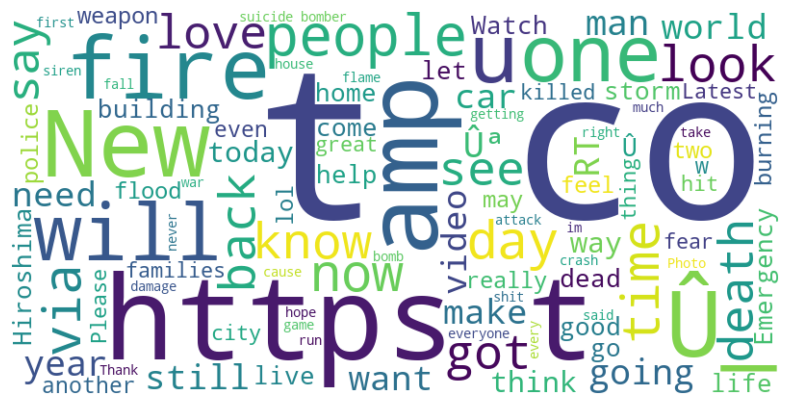

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

corpus = ' '.join(df['text'])
doc = nlp(corpus)

token_freq = Counter(token.text for token in doc)

single_line_text = " ".join([token.replace('\n', ' ') for token in df['text']])

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(single_line_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
import re

def preprocess_text(text):
    pass
    corpus = ' '.join(text)
    nlp = spacy.load('en_core_web_sm')  
    texts = nlp(corpus)
    preprocessed_text = [re.sub(r'[^a-zA-Z]', '', token.text.lower()) for token in texts if not token.is_stop]
    
    return preprocessed_text

In [14]:
preprocess_text(df['text'])

['deeds',
 'reason',
 '',
 'earthquake',
 'allah',
 'forgive',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 '',
 'canada',
 'residents',
 'asked',
 '',
 'shelter',
 'place',
 '',
 'notified',
 'officers',
 '',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected',
 '',
 'people',
 'receive',
 '',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 '',
 'got',
 'sent',
 'photo',
 'ruby',
 '',
 'alaska',
 'smoke',
 '',
 'wildfires',
 'pours',
 'school',
 '',
 '',
 'rockyfire',
 'update',
 '',
 '',
 'california',
 'hwy',
 '',
 '',
 'closed',
 'directions',
 'lake',
 'county',
 'fire',
 '',
 '',
 'cafire',
 '',
 'wildfires',
 '',
 'flood',
 '',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 '',
 'colorado',
 'springs',
 'areas',
 'hill',
 'fire',
 'woods',
 '',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'street',
 'afraid',
 'tornado',
 'coming',
 'area',
 '',
 'people',
 'died',
 'heat',
 'wave',
 'far',
 'haha